## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("사교육비조사.csv", encoding="cp949")
df.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [3]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [4]:
df_high = df[df['학교급구분코드'] == 3].copy()
df_high['학교급구분코드'].count()

30052

In [5]:
df_high.drop(['학교급구분코드'], axis=1, inplace=True)
df_high.count()

지역구분코드          30052
행정구역시도코드        30052
방과후학교참여여부       30052
방과후학교참여시간수      30052
EBS교재비          30052
사교육참여시간수        30052
일반교과사교육시간수      30052
예체능사교육시간수       30052
사교육비총비용         30052
총자녀수            30052
학생성적구분코드        30052
부_교육정도코드        28483
모_교육정도코드        29074
부모경제활동코드        29947
월평균가구소득코드       30052
진학희망고등학교유형코드        0
dtype: int64

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [6]:
df_high.drop(['지역구분코드', '행정구역시도코드'], axis=1, inplace=True)
df_high

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [7]:
df_high['방과후학교참여여부'].value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [8]:
label = df_high['방과후학교참여여부']

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(label.values.reshape(-1,1))
ohe_encoded = ohe.transform(label.values.reshape(-1,1))

ohe_df = pd.DataFrame(ohe_encoded, columns=['방과후학교참여', '방과후학교미참여'])
ohe_df

,방과후학교참여,방과후학교미참여
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
30047,0.0,1.0
30048,0.0,1.0
30049,0.0,1.0
30050,0.0,1.0


In [9]:
df_high.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

df_high = pd.concat([df_high, ohe_df], axis=1).drop('방과후학교참여여부', axis=1)
df_high

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여
0,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1.0,0.0
1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1.0,0.0
2,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1.0,0.0
3,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1.0,0.0
4,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0.0,1.0
30048,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0.0,1.0
30049,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0.0,1.0
30050,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0.0,1.0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [10]:
df_high.describe()

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여
count,30052.000000,30052.000000,30052.000000,30052.000000,30052.000000,30052.000000,30052.000000,30052.000000,28483.000000,29074.000000,29947.000000,30052.000000,0.0,30052.000000,30052.000000
mean,3.490250,7.540670,5.543491,4.319657,1.137717,419.753039,2.148077,3.178058,44.083664,41.791326,2.350920,4.540863,NaN,0.615533,0.384467
std,4.102449,13.319456,6.506507,5.573777,3.884653,483.469657,0.678370,1.248342,11.679145,10.716971,0.929836,2.136384,NaN,0.486477,0.486477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,NaN,0.000000,0.000000
50%,2.333333,0.000000,4.000000,1.666667,0.000000,297.148539,2.000000,3.000000,51.000000,41.000000,3.000000,4.000000,NaN,1.000000,0.000000
75%,6.000000,11.810589,9.000000,8.000000,0.000000,708.234253,2.000000,4.000000,51.000000,51.000000,3.000000,6.000000,NaN,1.000000,1.000000
max,34.666667,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,NaN,1.000000,1.000000


In [11]:
df_high.drop(['EBS교재비'], axis=1, inplace=True)
df_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여
0,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1.0,0.0
1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1.0,0.0
2,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1.0,0.0
3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1.0,0.0
4,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0.0,1.0
30048,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0.0,1.0
30049,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0.0,1.0
30050,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0.0,1.0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

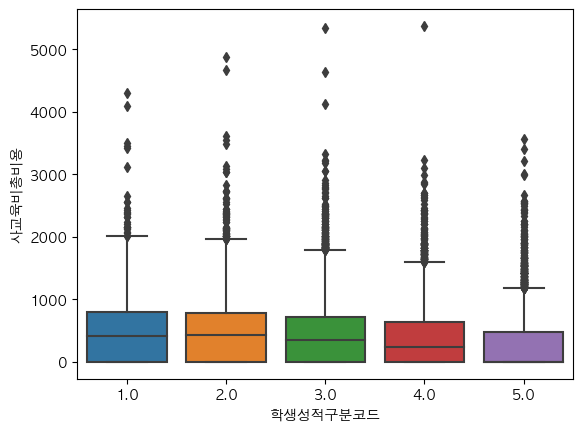

In [12]:
# 글꼴 깨짐 방지
plt.rc('font', family='AppleGothic')

sns.boxplot(x='학생성적구분코드', y='사교육비총비용', data=df_high)

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [13]:
df_high['학생성적구분코드'].value_counts()

학생성적구분코드
3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: count, dtype: int64

In [14]:
df_high['학생성적'] = df_high['학생성적구분코드'].map({1:'상위', 2:'상위', 3:'중위', 4:'하위', 5:'하위'})
df_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여,학생성적
0,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1.0,0.0,상위
1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1.0,0.0,중위
2,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1.0,0.0,하위
3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1.0,0.0,하위
4,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1.0,0.0,하위
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0.0,1.0,하위
30048,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0.0,1.0,하위
30049,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0.0,1.0,하위
30050,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0.0,1.0,상위


In [15]:
label2 = df_high['학생성적']

ohe2 = OneHotEncoder(sparse_output=False)
ohe2.fit(label2.values.reshape(-1,1))
ohe_encoded2 = ohe2.transform(label2.values.reshape(-1,1))

ohe_df2 = pd.DataFrame(ohe_encoded2, columns=['상위', '중위', '하위'])

df_high = pd.concat([df_high, ohe_df2], axis=1)
df_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여,학생성적,상위,중위,하위
0,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1.0,0.0,상위,1.0,0.0,0.0
1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1.0,0.0,중위,0.0,1.0,0.0
2,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1.0,0.0,하위,0.0,0.0,1.0
3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1.0,0.0,하위,0.0,0.0,1.0
4,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1.0,0.0,하위,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0.0,1.0,하위,0.0,0.0,1.0
30048,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0.0,1.0,하위,0.0,0.0,1.0
30049,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0.0,1.0,하위,0.0,0.0,1.0
30050,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0.0,1.0,상위,1.0,0.0,0.0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: label encoding은 범주형 데이터를 연속적인 수치 데이터로 표현한다. 숫자값으로 표현되기 때문에 숫자의 순서나 가중치가 매겨질 수 있는 문제점이 있다. 반면 one hot encoding은 범주형 데이터를 비트 벡터로 표현한다. 변수의 범주 수만큼 차원이 확대되기 때문에 주의해야 한다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [16]:
df_high.drop(['학생성적', '중위'], axis=1, inplace=True)
df_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여,방과후학교미참여,상위,하위
0,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1.0,0.0,1.0,0.0
1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1.0,0.0,0.0,0.0
2,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1.0,0.0,0.0,1.0
3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1.0,0.0,0.0,1.0
4,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0.0,1.0,0.0,1.0
30048,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0.0,1.0,0.0,1.0
30049,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0.0,1.0,0.0,1.0
30050,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0.0,1.0,1.0,0.0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 다중공선성은 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 원핫 인코딩시 범주의 분류 개수만큼 새로운 칼럼이 생기는데 이때 변수의 수가 증가하므로 다중공선성이 발생할 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [17]:
df_matrix = df_high.iloc[:,1:4]
df_matrix

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,12.0,12.0,0.0
...,...,...,...
30047,0.0,0.0,0.0
30048,0.0,0.0,0.0
30049,0.0,0.0,0.0
30050,0.0,0.0,0.0


<Axes: >

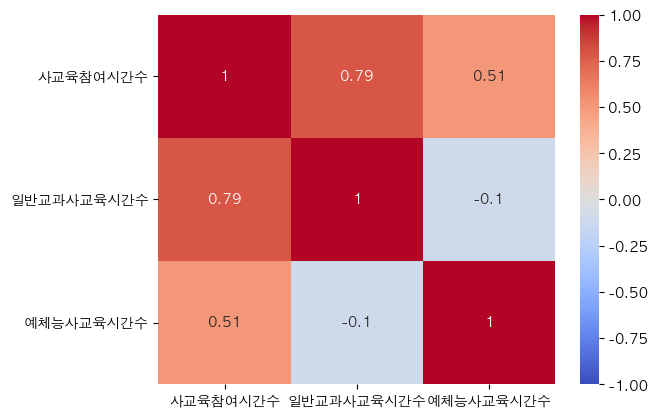

In [18]:
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

df_corr = df_matrix.corr()
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [19]:
# 고등학생을 대상으로 하므로 진학희망고등학교유형코드 삭제
df_high.drop(['진학희망고등학교유형코드'], axis=1, inplace=True)
df_high

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여,방과후학교미참여,상위,하위
0,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,1.0,0.0,1.0,0.0
1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,1.0,0.0,0.0,0.0
2,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,1.0,0.0,0.0,1.0
3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,1.0,0.0,0.0,1.0
4,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,0.0,1.0,0.0,1.0
30048,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,0.0,1.0,0.0,1.0
30049,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,0.0,1.0,0.0,1.0
30050,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,0.0,1.0,1.0,0.0


2.11.1 결측값 처리

In [20]:
# 결측값 확인
df_high.isnull().sum()

방과후학교참여시간수       0
사교육참여시간수         0
일반교과사교육시간수       0
예체능사교육시간수        0
사교육비총비용          0
총자녀수             0
학생성적구분코드         0
부_교육정도코드      1569
모_교육정도코드       978
부모경제활동코드       105
월평균가구소득코드        0
방과후학교참여          0
방과후학교미참여         0
상위               0
하위               0
dtype: int64

In [21]:
# 결측값 각 열의 최빈값으로 채우기 (코드이기 때문)
print(df_high['부_교육정도코드'].value_counts(), # 51
      df_high['모_교육정도코드'].value_counts(), # 31
      df_high['부모경제활동코드'].value_counts()) # 3

부_교육정도코드
51.0    11126
31.0     8891
41.0     3653
61.0     1742
71.0      767
54.0      371
21.0      355
44.0      301
62.0      196
34.0      167
72.0      161
11.0      145
52.0      112
42.0      100
63.0       60
24.0       54
64.0       45
73.0       41
53.0       39
55.0       38
45.0       28
43.0       20
32.0       20
14.0       14
65.0       12
74.0       10
75.0        8
22.0        6
8.0         1
Name: count, dtype: int64 모_교육정도코드
31.0    11076
51.0     9873
41.0     4729
61.0     1071
21.0      346
54.0      291
44.0      261
71.0      255
62.0      154
42.0      147
53.0      115
52.0      113
11.0      111
63.0       99
34.0       94
72.0       74
43.0       45
45.0       37
73.0       36
55.0       35
24.0       33
64.0       28
32.0       24
14.0        7
74.0        6
65.0        5
75.0        3
12.0        3
22.0        1
35.0        1
8.0         1
Name: count, dtype: int64 부모경제활동코드
3.0    18190
1.0     8917
2.0     2222
4.0      618
Name: count, dtype: int64


In [22]:
df_high['부_교육정도코드'].fillna(51, inplace=True)
df_high['모_교육정도코드'].fillna(31, inplace=True)
df_high['부모경제활동코드'].fillna(3, inplace=True)

2.11.2 데이터 시각화

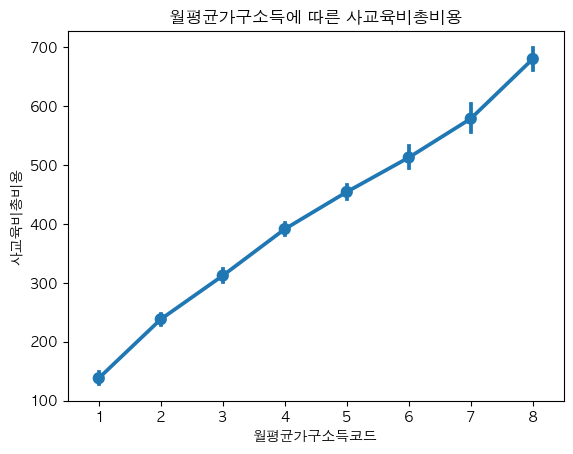

In [23]:
# 월평균가구소득에 따른 사교육비총비용
sns.pointplot(x='월평균가구소득코드', y='사교육비총비용', data=df_high)
plt.title('월평균가구소득에 따른 사교육비총비용')
plt.show()

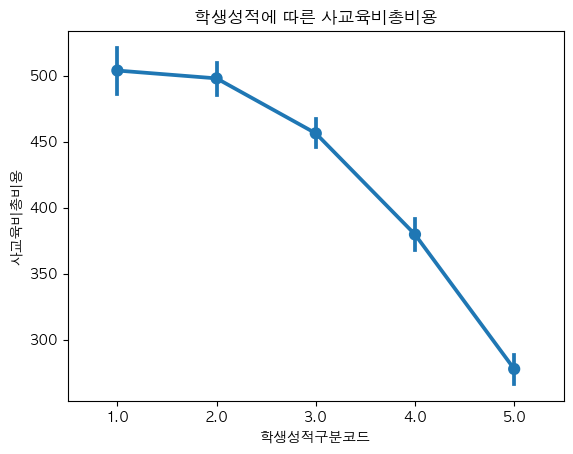

In [24]:
# 학생성적에 따른 사교육비총비용
sns.pointplot(x='학생성적구분코드', y='사교육비총비용', data=df_high)
plt.title('학생성적에 따른 사교육비총비용')
plt.show()

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

3.1.1 학습, 예측 데이터셋 만들기 

In [25]:
train_set, test_set = train_test_split(df_high, random_state=42)
train_set.shape, test_set.shape

((22539, 15), (7513, 15))

In [26]:
# 학습 데이터
X_train = train_set.loc[:, train_set.columns != '사교육비총비용']
y_train = train_set['사교육비총비용']

In [27]:
# 예측 데이터
X_test = test_set.loc[:, test_set.columns != '사교육비총비용']
y_test = test_set['사교육비총비용']

3.1.2 선형회귀모델

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# RMSE 평가
from sklearn.metrics import mean_squared_error

lr_pred = lr.predict(X_test)
mean_squared_error(lr_pred, y_test, squared = False)

303.67032431335963

3.1.3 DecisionTree

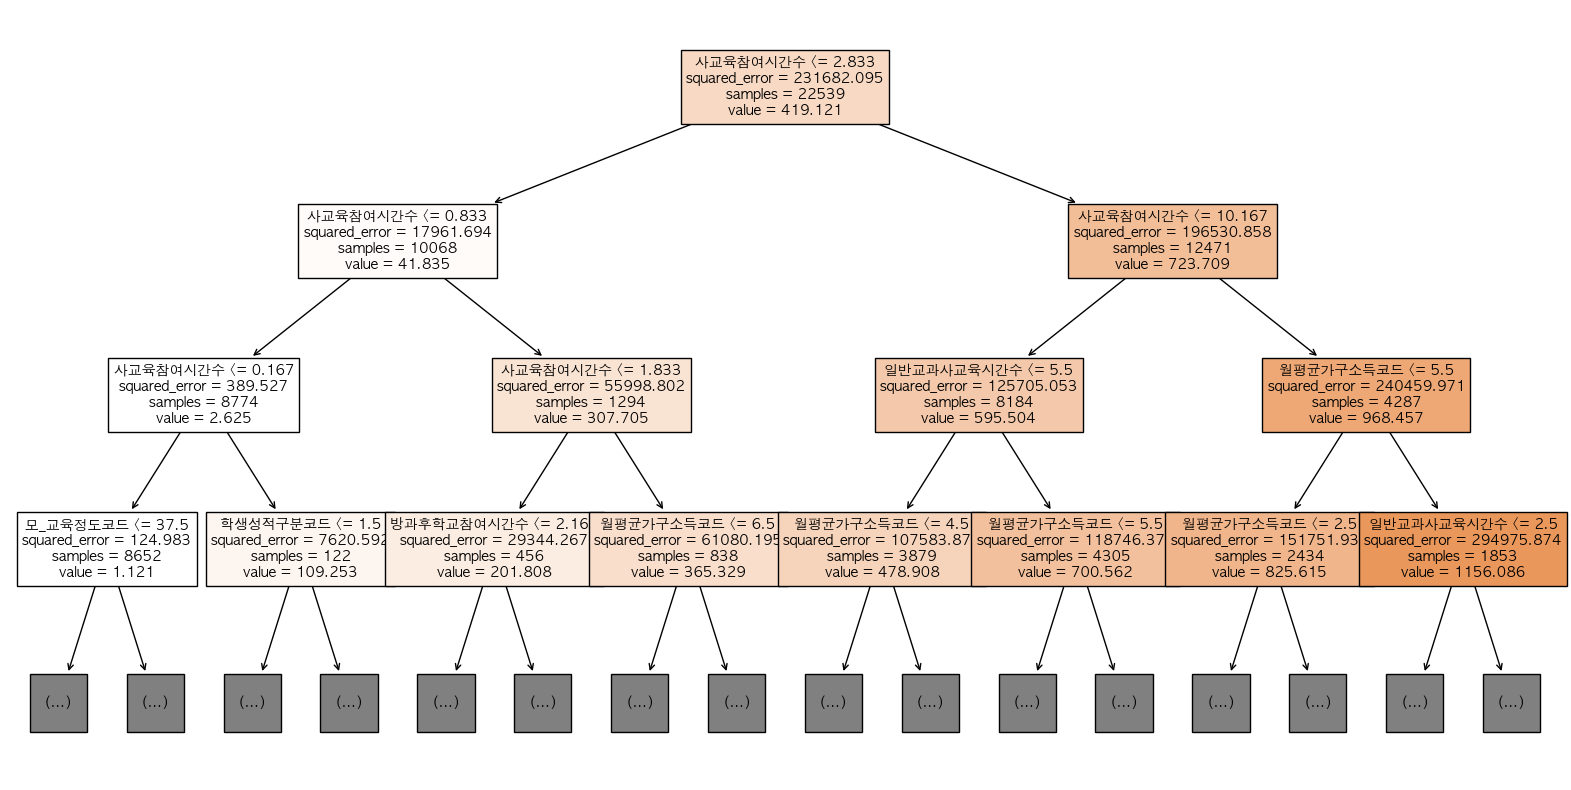

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree = plot_tree(tree_model,
                 feature_names = list(X_train.columns),
                 filled = True,
                 fontsize = 10,
                 max_depth = 3)

In [31]:
# RMSE 평가
tree_pred = tree_model.predict(X_test)
mean_squared_error(tree_pred, y_test, squared = False)

287.9930753574287

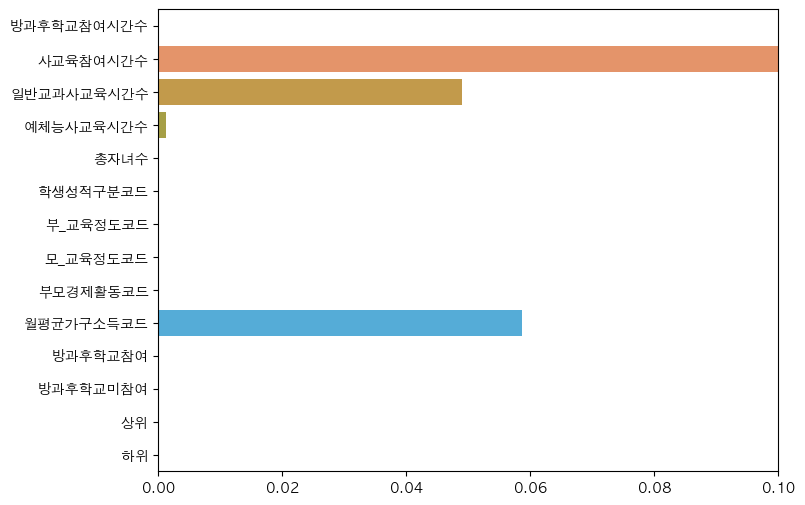

In [32]:
# 피처 중요도
plt.figure(figsize=(8,6))
plt.xlim([0, 0.1])
sns.barplot(x=tree_model.feature_importances_, y=list(X_train.columns))
plt.show()